In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("Q1_Sales_Data.csv")
df

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue
0,2025-02-16,Printer,East,CUST0065,8,146.77,1174.16
1,2025-03-28,Monitor,South,CUST0032,3,587.17,1761.51
2,2025-03-27,Keyboard,East,CUST0034,2,738.15,1476.30
3,2025-01-02,Printer,West,CUST0092,1,883.87,883.87
4,2025-01-17,Tablet,North,CUST0095,3,742.68,2228.04
...,...,...,...,...,...,...,...
500,2025-03-23,Smartphone,South,CUST0007,8,698.42,5587.36
501,2025-03-08,Tablet,South,CUST0074,4,656.06,2624.24
502,2025-02-26,Printer,South,CUST0052,8,472.72,3781.76
503,2025-02-02,Laptop,West,CUST0079,1,104.45,104.45


In [14]:
df[df.isnull().any(axis=1)]

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue
8,2025-03-23,Smartphone,West,CUST0034,1,172.10,NaN
13,2025-02-09,Keyboard,West,CUST0065,1,679.22,NaN
33,2025-03-24,Tablet,East,CUST0098,6,NaN,4111.74
57,2025-01-24,Monitor,West,CUST0084,3,633.12,NaN
69,2025-03-08,Printer,South,CUST0080,5,262.88,NaN
77,2025-03-05,Laptop,North,CUST0025,6,633.66,NaN
91,2025-02-18,Smartphone,West,CUST0092,9,567.80,NaN
95,2025-02-14,Mouse,West,CUST0021,2,NaN,647.68
155,2025-01-17,Tablet,East,CUST0044,9,NaN,6379.74
181,2025-03-18,Monitor,North,CUST0070,5,105.18,NaN


In [15]:
df.columns

Index(['Date', 'Product', 'Region', 'CustomerID', 'Quantity', 'Sales',
       'Revenue'],
      dtype='object')

In [16]:
df.isnull().sum()

Date           0
Product        0
Region         0
CustomerID     0
Quantity       0
Sales         15
Revenue       15
dtype: int64

In [17]:
df.dtypes

Date           object
Product        object
Region         object
CustomerID     object
Quantity        int64
Sales         float64
Revenue       float64
dtype: object

In [18]:
df["Sales"] = df["Sales"].fillna(df["Sales"].mean())
df["Revenue"] = df["Revenue"].fillna(df["Revenue"].mean())

In [19]:
df.isnull().sum()

Date          0
Product       0
Region        0
CustomerID    0
Quantity      0
Sales         0
Revenue       0
dtype: int64

In [20]:
df["Date"] = pd.to_datetime(df["Date"])

In [21]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [22]:
df

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
0,2025-02-16,Printer,East,CUST0065,8,146.77,1174.16,2,2025
1,2025-03-28,Monitor,South,CUST0032,3,587.17,1761.51,3,2025
2,2025-03-27,Keyboard,East,CUST0034,2,738.15,1476.30,3,2025
3,2025-01-02,Printer,West,CUST0092,1,883.87,883.87,1,2025
4,2025-01-17,Tablet,North,CUST0095,3,742.68,2228.04,1,2025
...,...,...,...,...,...,...,...,...,...
500,2025-03-23,Smartphone,South,CUST0007,8,698.42,5587.36,3,2025
501,2025-03-08,Tablet,South,CUST0074,4,656.06,2624.24,3,2025
502,2025-02-26,Printer,South,CUST0052,8,472.72,3781.76,2,2025
503,2025-02-02,Laptop,West,CUST0079,1,104.45,104.45,2,2025


In [23]:
df.duplicated().sum() # 5 rows are duplicated hence remove
df.drop_duplicates(inplace=True) # now 500 rows from 505

In [24]:
stats_summary = df[["Sales","Revenue","Quantity"]].describe()
stats_summary

,Sales,Revenue,Quantity
count,500.000000,500.000000,500.000000
mean,552.066123,2707.030037,4.938000
std,258.148739,2038.426310,2.663145
min,104.450000,104.450000,1.000000
25%,321.575000,1045.642500,2.000000
50%,551.856755,2179.015000,5.000000
75%,760.877500,3895.937500,7.000000
max,999.470000,8995.230000,9.000000


In [25]:
corr_matrix = df[["Sales","Revenue","Quantity"]].corr()
corr_matrix

,Sales,Revenue,Quantity
Sales,1.000000,0.581817,-0.052218
Revenue,0.581817,1.000000,0.683675
Quantity,-0.052218,0.683675,1.000000


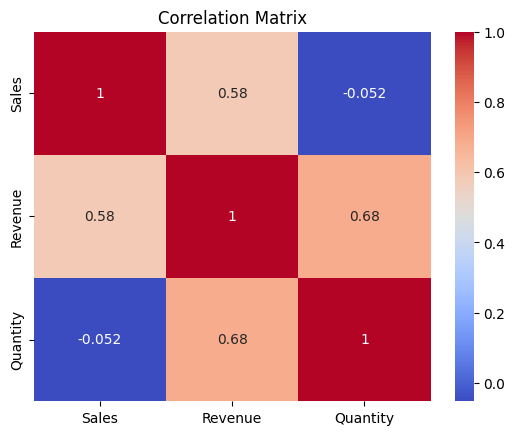

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(7,3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [27]:
df.sample(3)

,Date,Product,Region,CustomerID,Quantity,Sales,Revenue,Month,Year
350,2025-01-30,Mouse,North,CUST0066,9,336.80,3031.20,1,2025
177,2025-03-30,Printer,North,CUST0098,1,492.02,492.02,3,2025
260,2025-02-23,Smartphone,North,CUST0017,8,802.47,6419.76,2,2025


In [28]:
top_5 = df.groupby(by="Product")["Revenue"].sum().nlargest(5)
top_5

Product
Laptop        239749.935714
Monitor       226049.975714
Printer       195526.607143
Tablet        191228.170000
Smartphone    181344.541429
Name: Revenue, dtype: float64

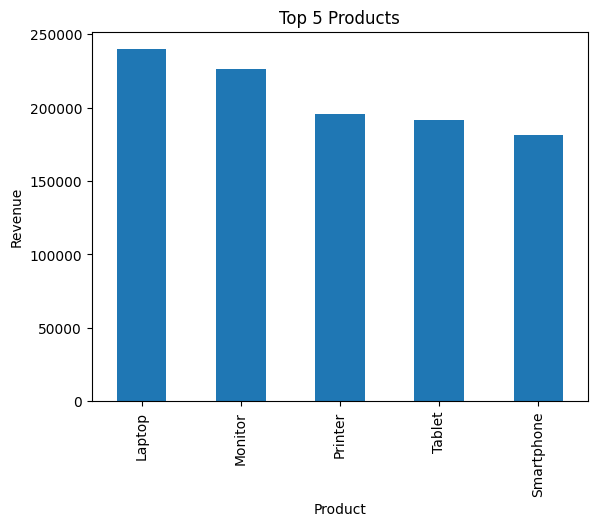

In [29]:
top_5.plot(kind="bar")
plt.title("Top 5 Products")
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

In [30]:
sales_montly = df.groupby(by="Month")["Sales"].sum()
sales_montly

Month
1    98673.220265
2    80320.823776
3    97039.017286
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales')

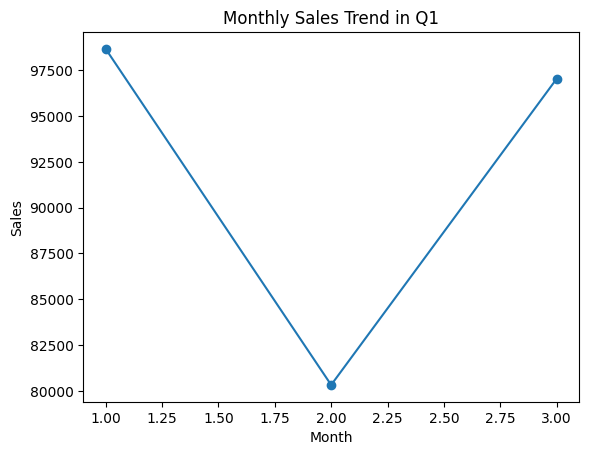

In [31]:
sales_montly.plot(kind="line", marker="o")
plt.title('Monthly Sales Trend in Q1')
plt.xlabel('Month')
plt.ylabel('Sales')

In [32]:
max = sales_montly.idxmax()
min = sales_montly.idxmin()

max

np.int32(1)

In [33]:
region_revenue = df.groupby(by="Region")["Revenue"].sum()
region_revenue

Region
East     302183.095714
North    431113.305714
South    320457.624286
West     299760.992857
Name: Revenue, dtype: float64

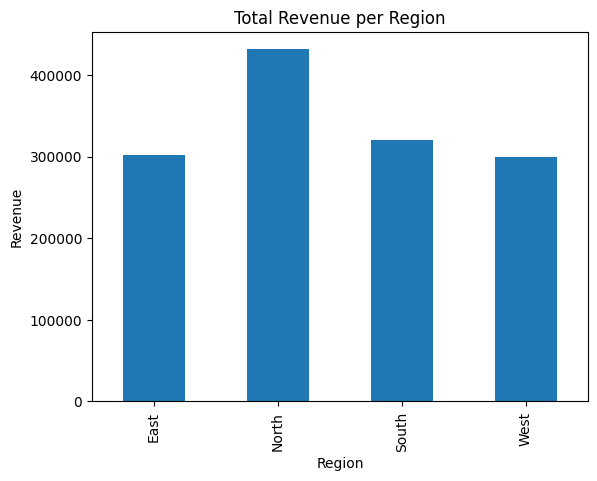

The region with the highest sales is North with a revenue of 431113.3057142857.


In [34]:
region_revenue.plot(kind="bar")
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

high_region = region_revenue.idxmax()
high_sales = region_revenue.max()
print(f'The region with the highest sales is {high_region} with a revenue of {high_sales}.')

In [35]:
customer_data_sales= df.groupby('CustomerID')["Sales"].count()
customer_data_revenue = df.groupby('CustomerID')["Revenue"].mean()

In [36]:
a = pd.DataFrame(customer_data_sales)
b = pd.DataFrame(customer_data_revenue)
new_data = pd.merge(a,b,on="CustomerID")
new_data

,Sales,Revenue
CustomerID,,
CUST0001,7,2485.520000
CUST0002,5,2032.668000
CUST0003,4,3560.957143
CUST0004,6,2716.118333
CUST0005,10,2124.542000
...,...,...
CUST0096,2,2183.605000
CUST0097,8,3924.928750
CUST0098,4,2202.885000
